In [4]:
# SETUP
from google.colab import drive
import os

drive.mount('/content/drive')

working_dir = '/content/drive/My Drive/mini-research-bdc2025/01_data_exploration/'
os.chdir(working_dir)

print("--- LOKASI KERJA SAAT INI ---")
!pwd
print("\n--- ISI FOLDER ---")
!ls
print("-" * 50)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- LOKASI KERJA SAAT INI ---
/content/drive/My Drive/mini-research-bdc2025/01_data_exploration

--- ISI FOLDER ---
01_data_cleaning.ipynb	datatrain.csv
datatrain_cleaned.csv	emotion_distribution.png
--------------------------------------------------


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('datatrain.csv')

print(df.head())

df.info()

   id                                              video   emotion
0   1  https://www.instagram.com/reel/DNKcHgdA-d1/?ig...  Surprise
1   2  https://www.instagram.com/reel/DNHwrh2gnBm/?ig...  Surprise
2   3  https://www.instagram.com/reel/DM7QsjnRCoa/?ig...  Surprise
3   4  https://www.instagram.com/reel/DNBBEt6Paxj/?ig...  Surprise
4   5  https://www.instagram.com/reel/DMz13fQzZsN/?ig...     Proud
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       803 non-null    int64 
 1   video    803 non-null    object
 2   emotion  803 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.9+ KB


In [8]:
print(df.isnull().sum())

print(f"Jumlah baris yang sama persis (duplikat penuh): {df.duplicated().sum()}")
print(f"Jumlah URL video yang duplikat: {df['video'].duplicated().sum()}")

id         0
video      0
emotion    0
dtype: int64
Jumlah baris yang sama persis (duplikat penuh): 0
Jumlah URL video yang duplikat: 27


In [9]:
print("--- Distribusi Emosi (Sebelum Cleaning) ---")
print(df['emotion'].value_counts())

--- Distribusi Emosi (Sebelum Cleaning) ---
emotion
Surprise    320
Trust       181
Proud       154
Joy          53
Anger        34
Sadness      17
Fear         16
Neutral       8
Terkjut       3
Terkejut      2
Trkejut       2
Bangga        2
Love          1
Kaget         1
Marah         1
Loyalty       1
Faith         1
Percaya       1
Sad           1
terkejut      1
kaget         1
Marh          1
Trekejut      1
Name: count, dtype: int64


In [10]:
file_path = 'datatrain.csv'
df = pd.read_csv(file_path)

print(f"\nData awal berhasil dimuat: {len(df)} baris.")

df_cleaned = df.copy()
df_cleaned.drop_duplicates(subset=['video'], keep='first', inplace=True)

emotion_mapping = {
    'Surprise': 'Surprise', 'Terkjut': 'Surprise', 'Terkejut': 'Surprise',
    'Trkejut': 'Surprise', 'kaget': 'Surprise', 'terkejut': 'Surprise',
    'Kaget': 'Surprise', 'Trekejut': 'Surprise',
    'Trust': 'Trust', 'Percaya': 'Trust', 'Faith': 'Trust', 'Loyalty': 'Trust',
    'Proud': 'Proud', 'Bangga': 'Proud',
    'Anger': 'Anger', 'Marh': 'Anger', 'Marah': 'Anger',
    'Sadness': 'Sadness', 'Sad': 'Sadness',
    'Joy': 'Joy', 'Love': 'Joy',
    'Fear': 'Fear',
    'Neutral': 'Neutral'
}
df_cleaned['emotion'] = df_cleaned['emotion'].replace(emotion_mapping)
print("Pembersihan dan standardisasi label selesai.")


Data awal berhasil dimuat: 803 baris.
Pembersihan dan standardisasi label selesai.


Data yang sudah bersih berhasil disimpan di: 'datatrain_cleaned.csv'


/tmp/ipython-input-3822510445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cleaned_emotion_counts.index, y=cleaned_emotion_counts.values, palette='viridis')


Plot distribusi emosi berhasil disimpan sebagai: 'emotion_distribution.png'


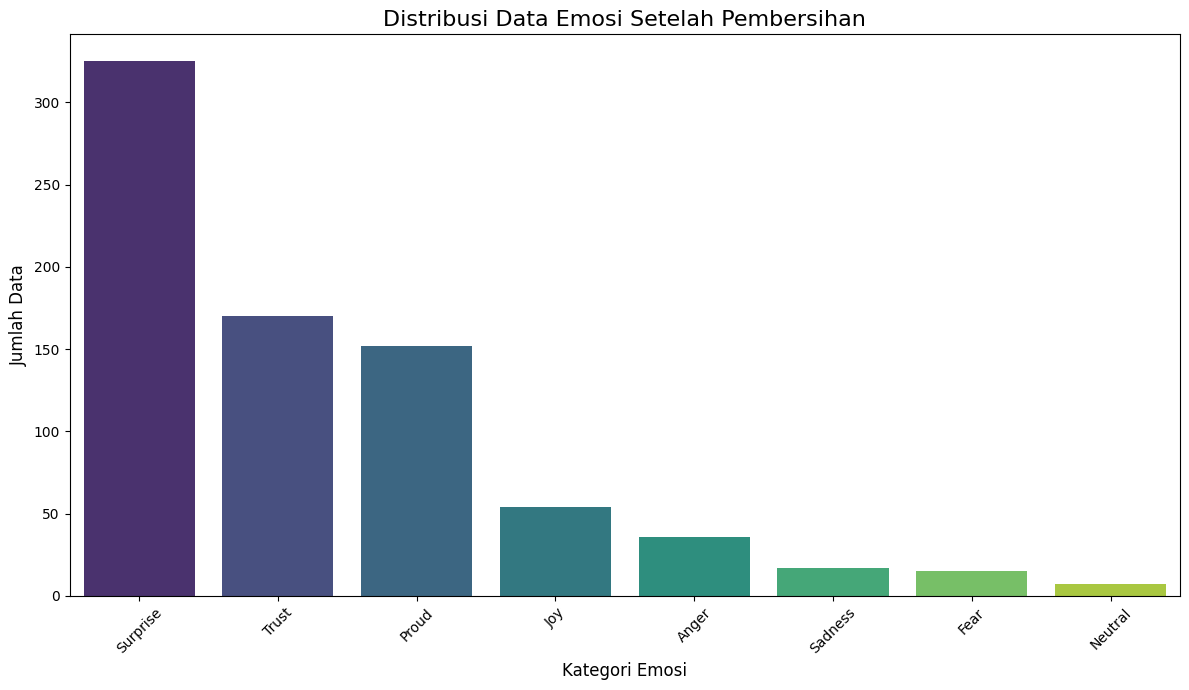

In [13]:
cleaned_file_path = 'datatrain_cleaned.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Data yang sudah bersih berhasil disimpan di: '{cleaned_file_path}'")


cleaned_emotion_counts = df_cleaned['emotion'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=cleaned_emotion_counts.index, y=cleaned_emotion_counts.values, palette='viridis')
plt.title('Distribusi Data Emosi Setelah Pembersihan', fontsize=16)
plt.xlabel('Kategori Emosi', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plot_filename = 'emotion_distribution.png'
plt.savefig(plot_filename)
print(f"Plot distribusi emosi berhasil disimpan sebagai: '{plot_filename}'")

plt.show()

In [ ]:
# =================================================================
# SINKRONISASI FILE HASIL (.csv, .png, dll) KE GITHUB
# =================================================================

%cd /content/drive/My Drive/mini-research-bdc2025/

!git config --global user.name "Frynnn-69"
!git config --global user.email "firyanfatihh@gmail.com"

print("--- File yang akan di-upload ---")
!git status

!git add .
print("\n✅ Semua file baru telah ditambahkan.")

!git commit -m "Tambahkan output dari notebook cleaning (data & plot)"
print("✅ Perubahan telah di-commit.")

print("\nSilakan masukkan username dan Personal Access Token (PAT) Anda...")
!git push